# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

### **Import Libraries and Settings**

In [117]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [118]:
df = pd.read_csv('marketing_campaign_data.csv')

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

## Data Understanding & Initial Transformation

In [119]:
df.sample(10)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
811,811,5585,1972,S1,Lajang,21359000.0,1,0,20-04-2013,1,12000,2000,17000,6000,1000,10000,2,2,0,3,8,0,0,0,0,0,0,3,11,1
1574,1574,8685,1977,S1,Menikah,42014000.0,1,0,17-08-2012,56,244000,15000,108000,4000,15000,50000,6,7,1,6,8,0,0,0,0,0,0,3,11,1
1910,1910,5832,1960,D3,Bertunangan,92556000.0,0,0,20-04-2014,32,493000,183000,352000,184000,23000,28000,0,3,5,13,0,0,0,0,0,0,0,3,11,0
1253,1253,961,1972,S1,Menikah,74716000.0,0,1,12-09-2013,92,133000,27000,421000,13000,195000,71000,2,7,3,5,4,0,0,0,0,0,0,3,11,0
1035,1035,9503,1980,S1,Lajang,28071000.0,0,0,29-08-2012,65,39000,33000,130000,41000,26000,44000,2,5,1,5,8,0,0,0,0,0,0,3,11,0
992,992,7378,1981,S2,Bertunangan,42021000.0,1,0,31-08-2012,34,393000,5000,136000,7000,5000,27000,5,10,1,6,9,1,0,0,0,0,0,3,11,0
375,375,10703,1975,S2,Lajang,46098000.0,1,1,18-08-2012,86,57000,0,27000,0,0,36000,4,3,2,2,8,0,0,0,0,0,0,3,11,0
803,803,9930,1944,S3,Lajang,82716000.0,0,0,05-11-2013,8,606000,148000,228000,15000,148000,22000,1,6,8,13,2,0,0,0,0,0,0,3,11,0
377,377,4459,1989,S1,Lajang,30279000.0,1,0,30-12-2012,13,10000,4000,14000,4000,4000,1000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1167,1167,6263,1968,S1,Bertunangan,35322000.0,1,2,22-08-2012,34,28000,9000,37000,12000,7000,13000,3,2,0,4,8,0,0,0,0,0,0,3,11,0


In [120]:
# Initial transformation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_index(inplace=True)

### **Data Information**

In [121]:
df.shape

(2240, 29)

- The dataset have 2240 rows and 29 columns

In [122]:
# Check data information
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,Unique Sample
0,ID,int64,0,0.00,0,2240,"[5524, 2174, 4141, 6182, 5324]"
1,Year_Birth,int64,0,0.00,0,59,"[1957, 1954, 1965, 1984, 1981]"
2,Education,object,0,0.00,0,5,"[S1, S3, S2, SMA, D3]"
3,Marital_Status,object,0,0.00,0,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
4,Income,float64,24,1.07,0,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]"
5,Kidhome,int64,0,0.00,0,3,"[0, 1, 2]"
6,Teenhome,int64,0,0.00,0,3,"[0, 1, 2]"
7,Dt_Customer,object,0,0.00,0,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]"
8,Recency,int64,0,0.00,0,100,"[58, 38, 26, 94, 16]"
9,MntCoke,int64,0,0.00,0,776,"[635000, 11000, 426000, 173000, 520000]"


Feature | Descriptions
--------|-------------
`ID` | ID unik dari setiap pelanggan
`Year_Birth` | tahun kelahiran pelanggan
`Complain` | 1 jika pelanggan komplain dalam 2 tahun terakhir
`Dt_Customer` | tanggal pendaftaran pelanggan dengan perusahaan (gabung member)
`Education` | tingkat pendidikan pelanggan
`Marital_Status` | status pernikahan pelanggan
`Kidhome` | jumlah anak kecil dalam rumah tangga pelanggan
`Teenhome` |  jumlah remaja dalam rumah tangga pelanggan
`Income` | pendapatan rumah tangga pelanggan per tahun
`MntFishProducts` | jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir
`MntMeatProducts` | jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir
`MntFruits` | jumlah yang dibelanjakan untuk produk buah-buahan dalam 2 tahun terakhir
`MntSweetProducts` | jumlah yang dibelanjakan untuk produk manis dalam 2 tahun terakhir
`MntWines` | jumlah yang dibelanjakan untuk produk anggur dalam 2 tahun terakhir
`MntGoldProds` | jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir
`NumDealsPurchases` | jumlah pembelian yang dilakukan dengan diskon
`NumCatalogPurchases`| jumlah pembelian yang dilakukan dengan menggunakan katalog (membeli barang yang akan dikirim melalui pos)
`NumStorePurchases` | jumlah pembelian yang dilakukan secara langsung di toko
`NumWebPurchases` | jumlah pembelian yang dilakukan melalui situs web perusahaan
`NumWebVisitsMonth` | jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir
`Recency` | jumlah hari sejak pembelian terakhir
`Response` | 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

<br>

- Other than `Dt_Customer` that we will convert to datetime, every features have the correct data types.

In [123]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [124]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

- `Income` column have a small percentage missing values, we will need to handle that with imputation based on the distribution

<Axes: xlabel='Income', ylabel='Count'>

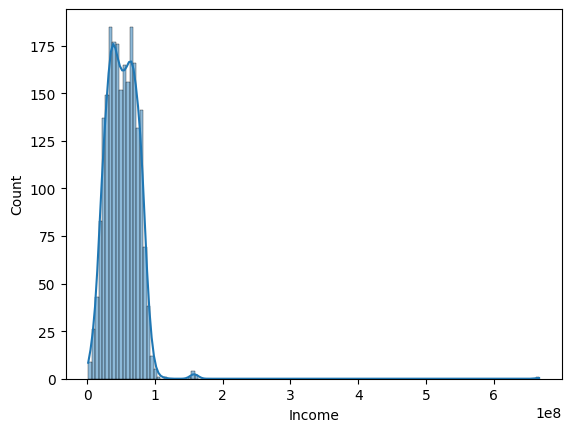

In [125]:
# Checking income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median

In [126]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Columns Grouping Based on Data Type

In [127]:
# Check dataframe values
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
266,1225,1963,S1,Menikah,80124000.0,0,0,2014-06-26,47,483000,84000,398000,205000,84000,241000,1,3,7,8,1,1,0,0,0,0,0,3,11,0
729,11101,1991,S1,Bertunangan,89891000.0,0,0,2013-04-15,17,412000,22000,132000,59000,28000,183000,1,11,6,8,4,0,0,1,0,0,0,3,11,0
2226,4478,1979,S1,Menikah,63777000.0,1,1,2013-03-24,87,457000,5000,106000,15000,17000,53000,8,11,1,6,8,0,0,0,0,0,0,3,11,0
1580,3790,1956,S1,Bertunangan,34633000.0,2,1,2014-01-23,31,8000,1000,5000,0,0,1000,1,1,0,2,6,0,0,0,0,0,0,3,11,0
2040,5631,1991,S1,Lajang,49767000.0,0,0,2013-05-02,92,202000,47000,197000,55000,42000,149000,1,5,4,8,4,0,0,0,0,0,0,3,11,0
857,425,1985,S1,Menikah,55357000.0,2,0,2013-02-19,66,374000,64000,116000,84000,25000,64000,3,6,2,11,5,0,0,0,0,0,0,3,11,0
607,8477,1956,S1,Cerai,26150000.0,2,1,2013-03-11,61,5000,1000,13000,3000,5000,1000,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1048,8870,1984,S1,Bertunangan,35196000.0,1,0,2012-11-13,68,75000,12000,141000,43000,39000,187000,6,6,1,5,8,0,0,0,0,0,0,3,11,1
1965,6203,1947,S1,Bertunangan,74485000.0,0,0,2013-08-24,58,499000,149000,815000,173000,49000,49000,1,6,7,12,3,0,0,0,0,0,0,3,11,0
1065,4415,1961,S1,Menikah,16860000.0,1,1,2012-09-12,19,10000,4000,4000,3000,3000,14000,3,1,1,3,7,0,0,0,0,0,0,3,11,0


In [128]:
# # Another way of checking unique values (before grouping based on data types)
# for x in df.columns:
#     unique_values_check = list(df[x].unique())
#     unique_values_check.sort()

#     print(f"{x}")
#     print(f"{df[x].unique()}")
#     print()

#     # if len(unique_values_check) >= 10:
#     #     unique_values_check = unique_values_check[:10] + ['.....']
#     #     print(unique_values_check)
#     # else:
#     #     print(unique_values_check)
#     # print()

- Categorical columns (10 columns): 
    - `ID` : nominal
    - `Education` : ordinal
    - `Marital_Status` : nominal
    - `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns)
    - `Year_Birth, Income, Kidhome, Teenhome, 
    Recency, MntCoke, MntFruits, MntMeatProducts, 
    MntFishProducts, MntSweetProducts, MntGoldProds, 
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, 
    NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue`

- Date column (1 column) : `Dt_Customer`

In [129]:
# Grouping columns based on data types
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [130]:
# Checking every unique values in categorical columns
for col in cats_cols :
    print()
    print(f"{col} : {df[col].unique()}")


ID : [5524 2174 4141 ... 7270 8235 9405]

Education : ['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

AcceptedCmp1 : [0 1]

AcceptedCmp2 : [0 1]

AcceptedCmp3 : [0 1]

AcceptedCmp4 : [0 1]

AcceptedCmp5 : [0 1]

Complain : [0 1]

Response : [1 0]


In [131]:
# Checking every unique values in numerical columns
for col in nums_cols :
    print()
    print(f"{col} : {df[col].unique()}")


Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Income : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Kidhome : [0 1 2]

Teenhome : [0 1 2]

Recency : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

MntCoke : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   9600

## Handling Outliers

In [132]:
len(df[nums_cols].columns)

18

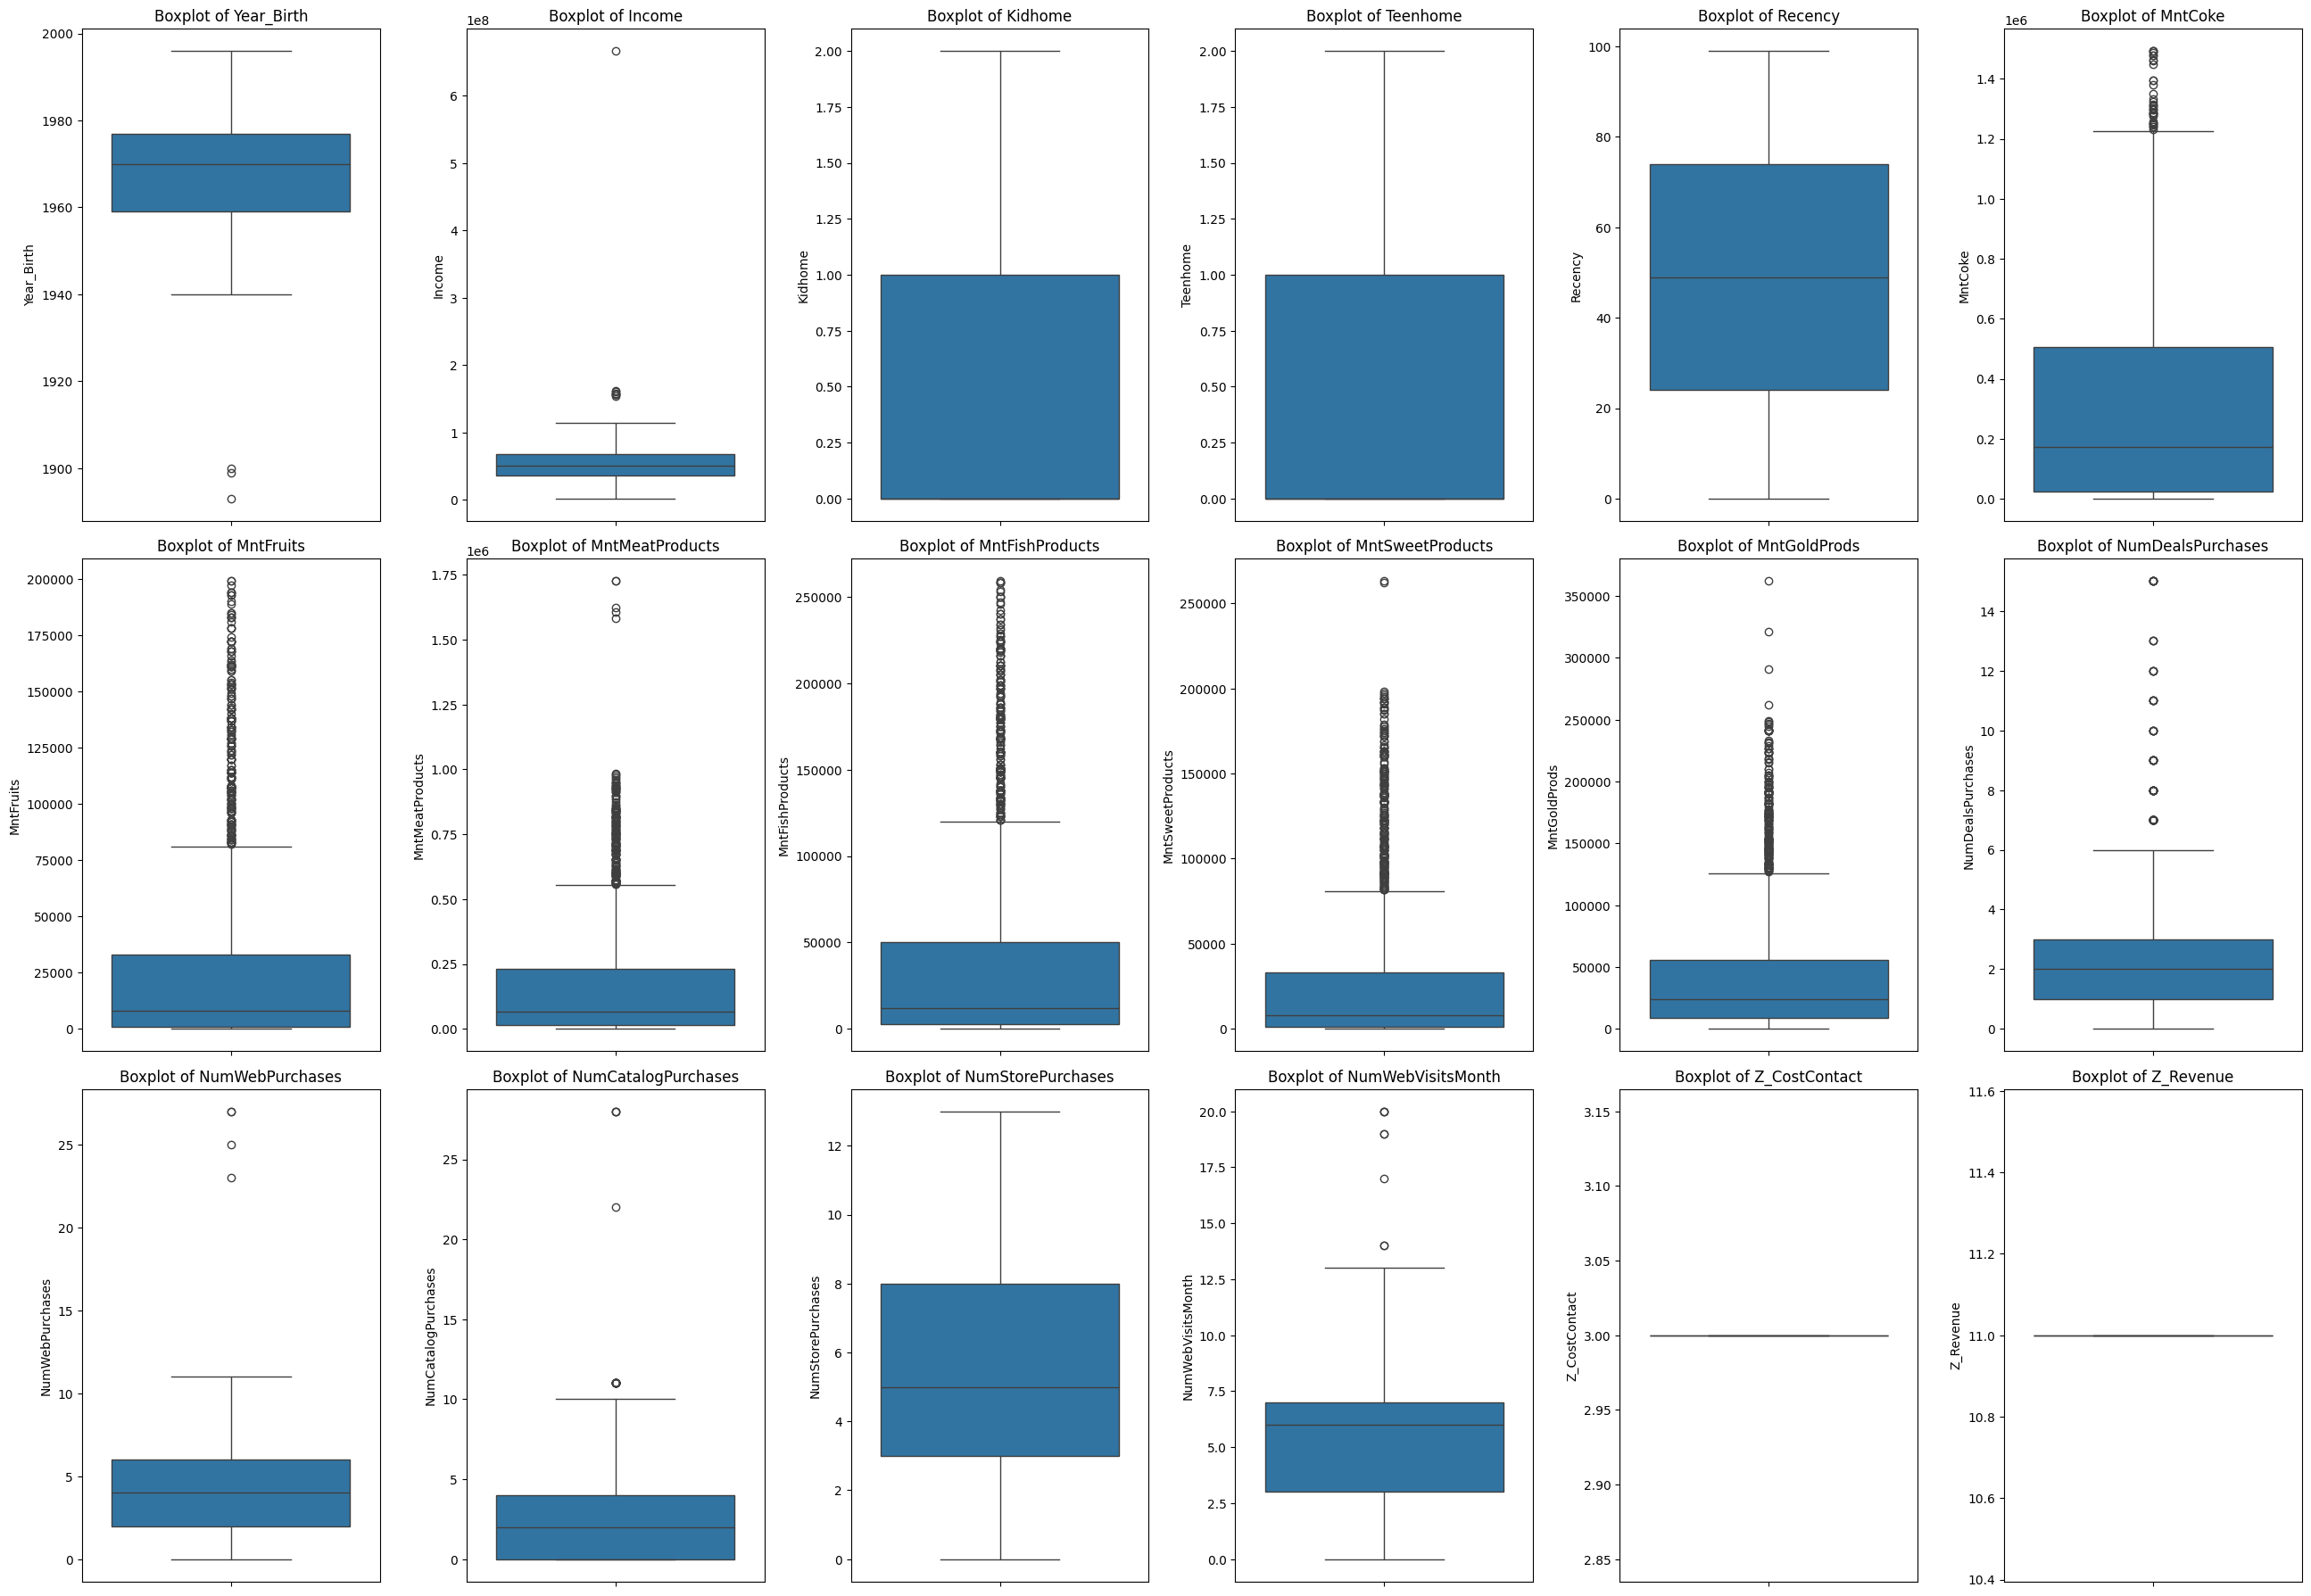

In [133]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

In [134]:
# Outlier Detection and Handling

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print('Amount of Outlier Rows :', len(df[~filtered_entries]))
print('Amount of Non-Outlier Rows :', len(df[filtered_entries]))
print()

check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data':outlier,
    'Non-Outlier Data':no_outlier
})

check_outliers


Amount of Rows: 2240
Amount of Outlier Rows : 706
Amount of Non-Outlier Rows : 1534



,Column Name,Outlier Exist,Lower Limit,Upper Limit,Outlier Data,Non-Outlier Data
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-13587750.0,117416250.0,8,2232
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,MntCoke,True,-697000.0,1225000.0,35,2205
6,MntFruits,True,-47000.0,81000.0,227,2013
7,MntMeatProducts,True,-308000.0,556000.0,175,2065
8,MntFishProducts,True,-67500.0,120500.0,223,2017
9,MntSweetProducts,True,-47000.0,81000.0,248,1992


In [135]:
# Make outliers-filtered new dataframe
df_filtered_outliers = df[filtered_entries]
df_filtered_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,S1,Lajang,26816000.0,0,0,2012-08-17,50,5000,1000,6000,3000,4000,3000,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2234,8372,1974,S1,Menikah,34421000.0,1,0,2013-07-01,81,3000,3000,7000,6000,2000,9000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,2014-01-25,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,2014-01-24,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


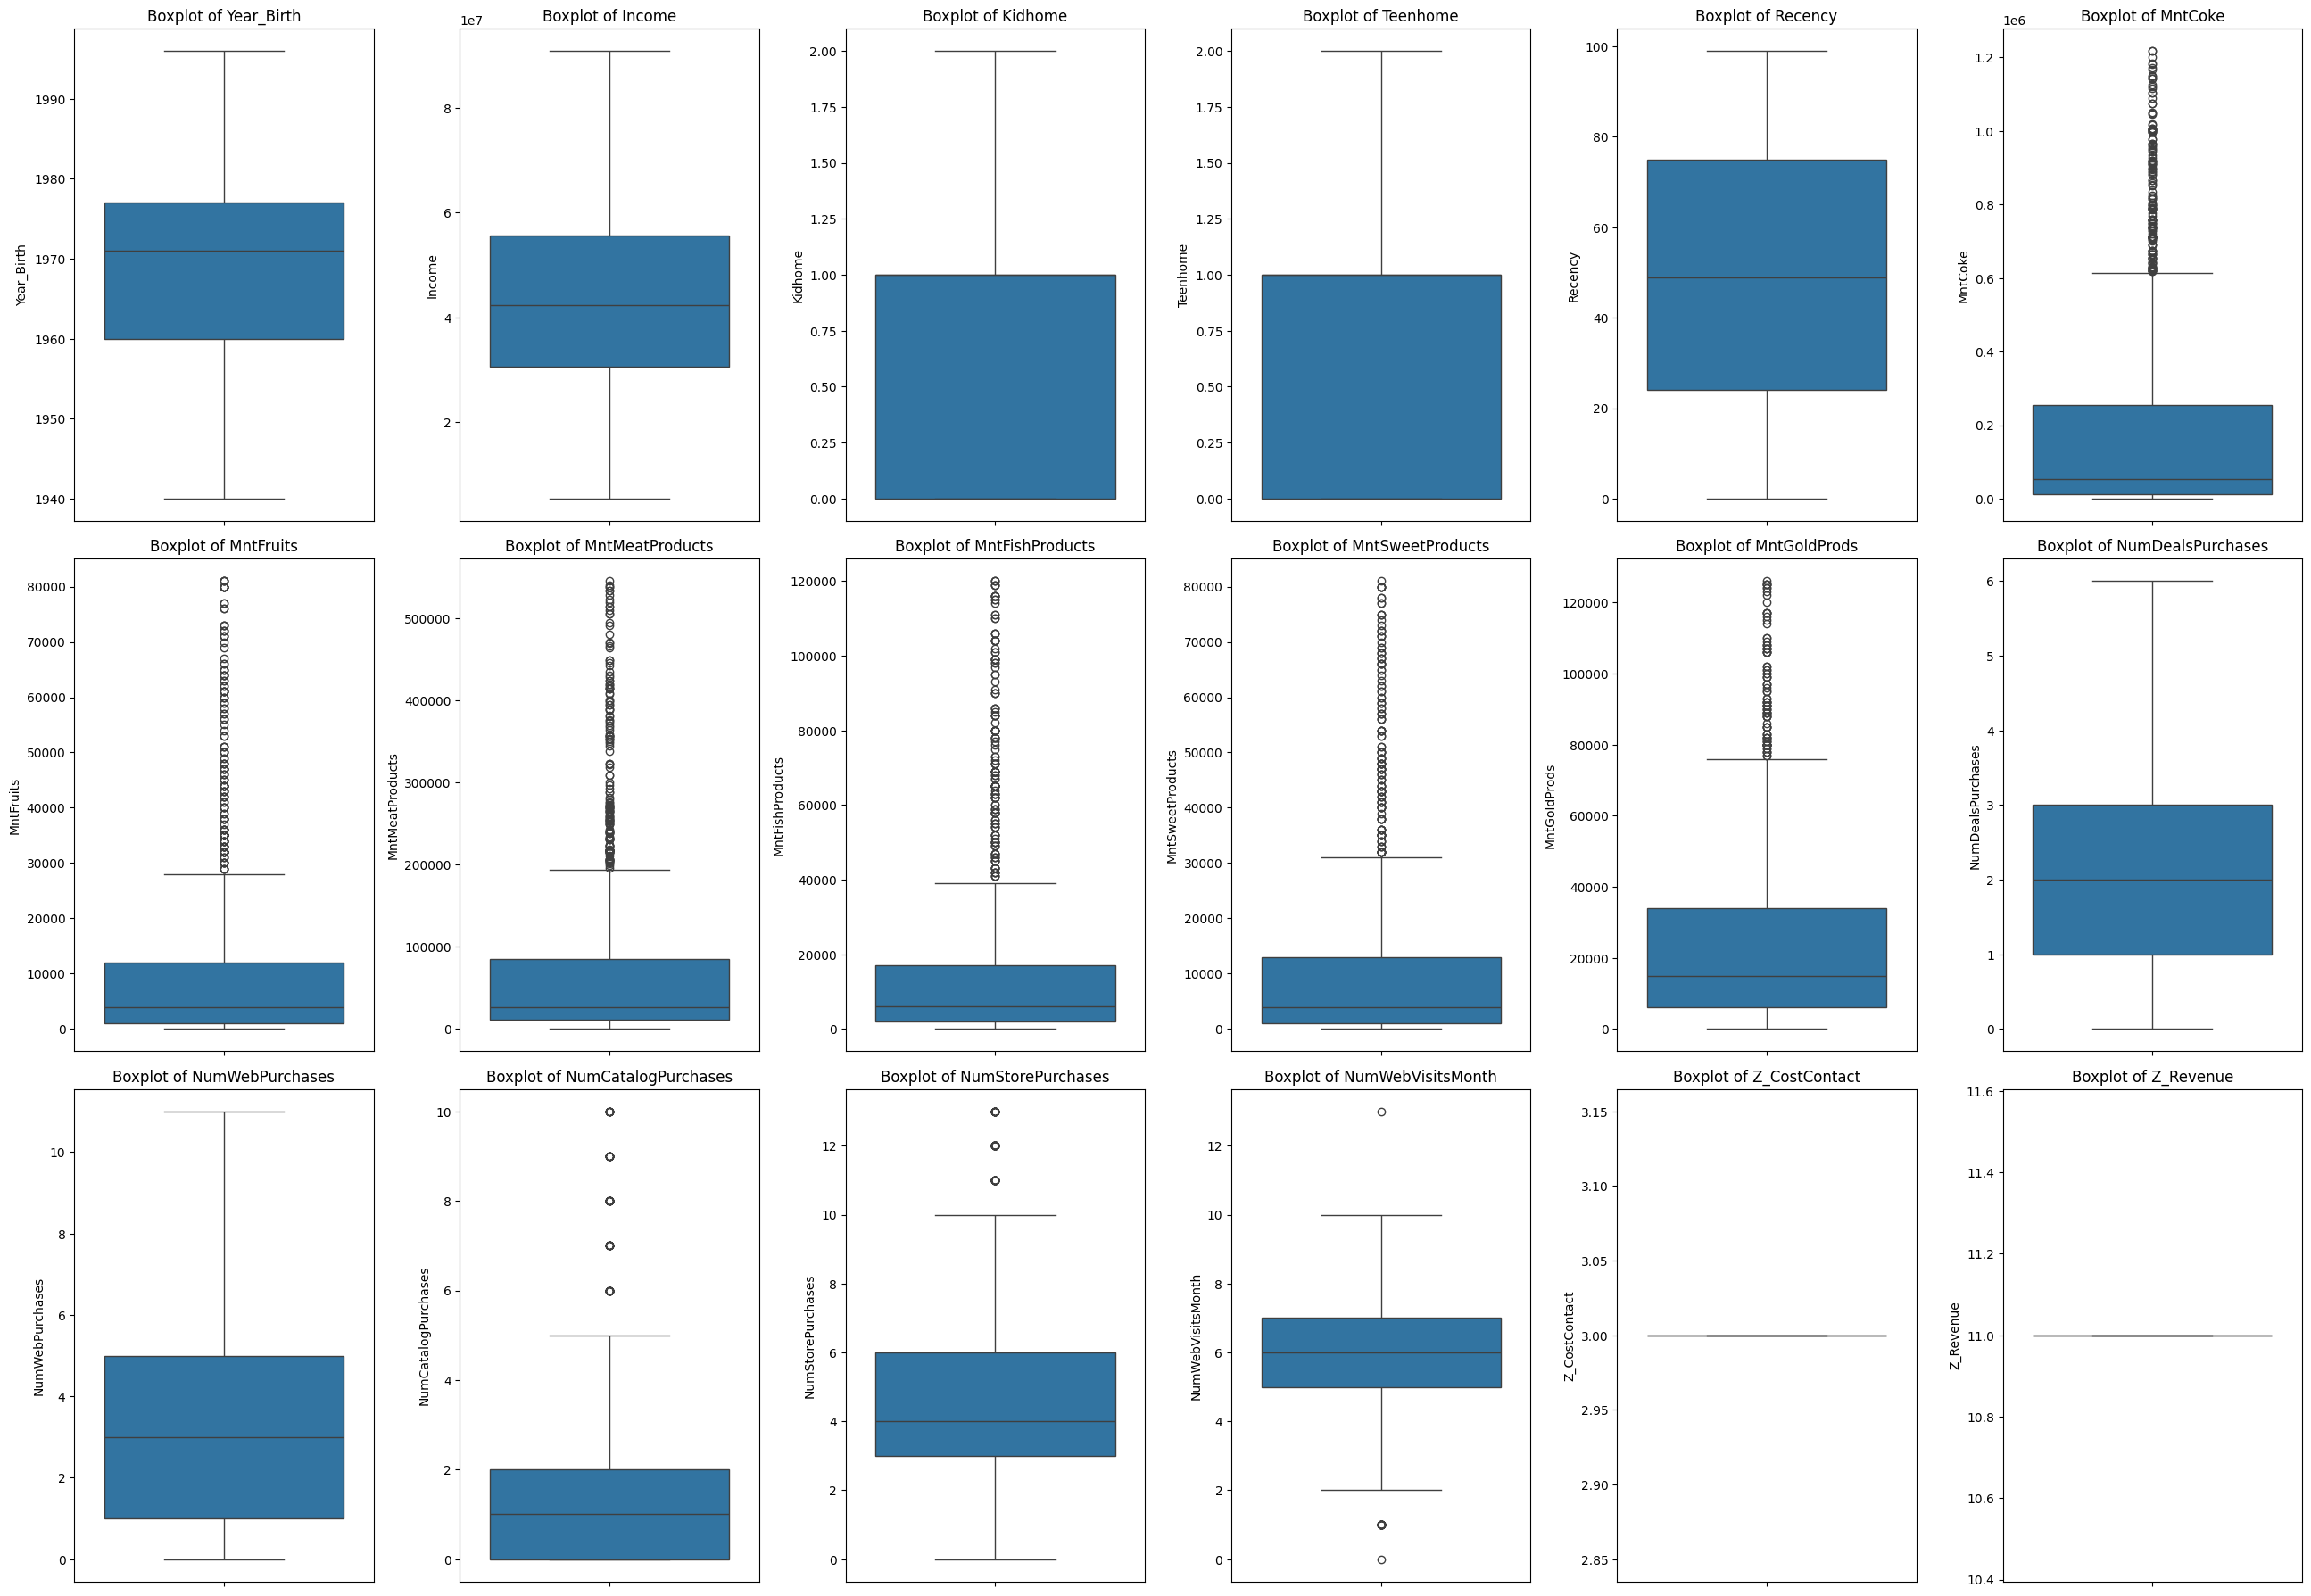

In [136]:
# Check data after filtered
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df_filtered_outliers, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

## Feature Engineering

### Age Column

In [137]:
# Age feature engineering

"""
We don't really have the year information in the data for this purpose, so we will just use the year now
"""
# from datetime import datetime

# currtime = datetime.now().year()

year_data = 2024
df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

Check the distribution of age to help with the grouping

<Axes: xlabel='Age', ylabel='Count'>

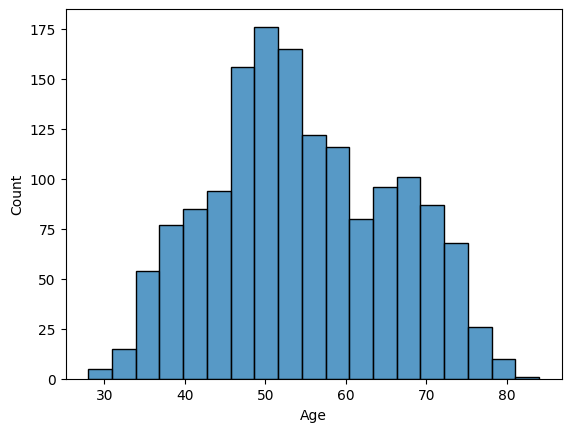

In [138]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [139]:
# Age grouping

def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [140]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    886
Senior Adult    497
Young Adult     151
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [141]:
# Number of child the customer have feature engineering

df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [142]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    900
2    358
0    237
3     39
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [143]:
df_filtered_outliers['Membership_Duration'] = 2024 - df_filtered_outliers['Dt_Customer'].dt.year

In [144]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    809
10    422
12    303
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Cmp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [145]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers['AcceptedCmp1'].astype("int64") + df_filtered_outliers['AcceptedCmp2'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp3'].astype("int64") + df_filtered_outliers['AcceptedCmp4'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp5'].astype("int64")

In [146]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1308
1     183
2      31
3       9
4       3
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [147]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers['MntCoke']+ df_filtered_outliers['MntFruits'] + df_filtered_outliers['MntMeatProducts'] \
                                        + df_filtered_outliers['MntFishProducts'] + df_filtered_outliers['MntSweetProducts'] + df_filtered_outliers['MntGoldProds']

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [148]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers['NumDealsPurchases'] + df_filtered_outliers['NumWebPurchases'] \
                                        + df_filtered_outliers['NumCatalogPurchases'] + df_filtered_outliers['NumStorePurchases']

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [149]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

In [150]:
?df.plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x0000027DCF7FDB50>
File:           c:\users\cikal merdeka\appdata\local\programs\python\python312\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : s

<Axes: ylabel='Density'>

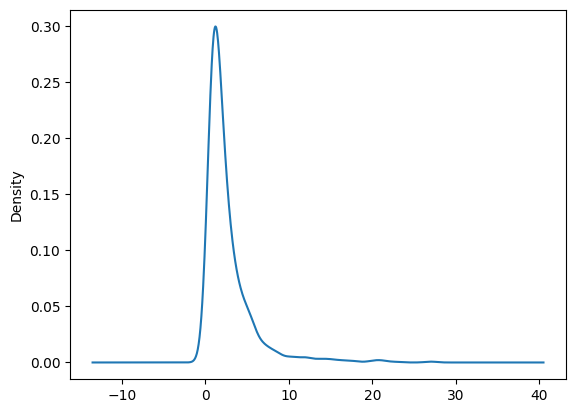

In [151]:
df_filtered_outliers['CVR'].plot(kind='kde')

# **Exploratory Data Analysis (EDA)**

In [152]:
df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 1 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1534 non-null   int64         
 1   Year_Birth           1534 non-null   int64         
 2   Education            1534 non-null   object        
 3   Marital_Status       1534 non-null   object        
 4   Income               1534 non-null   float64       
 5   Kidhome              1534 non-null   int64         
 6   Teenhome             1534 non-null   int64         
 7   Dt_Customer          1534 non-null   datetime64[ns]
 8   Recency              1534 non-null   int64         
 9   MntCoke              1534 non-null   int64         
 10  MntFruits            1534 non-null   int64         
 11  MntMeatProducts      1534 non-null   int64         
 12  MntFishProducts      1534 non-null   int64         
 13  MntSweetProducts     1534 non-null   i

## Statistical Summary

In [153]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [165]:
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional column grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [161]:
# Product spending desc
df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MntCoke,1534.0,189250.977836,266511.838256,0.0,13000.0,53500.0,254000.0,1218000.0
MntFruits,1534.0,10403.520209,15745.016938,0.0,1000.0,4000.0,12000.0,81000.0
MntMeatProducts,1534.0,70374.185137,100901.427093,0.0,11000.0,26000.0,84750.0,545000.0
MntFishProducts,1534.0,15173.402868,23314.126959,0.0,2000.0,6000.0,17000.0,120000.0
MntSweetProducts,1534.0,10472.620600,15752.040427,0.0,1000.0,4000.0,13000.0,81000.0
MntGoldProds,1534.0,23991.525424,25650.911666,0.0,6000.0,15000.0,34000.0,126000.0
Total_Spending,1534.0,319666.232073,384128.280166,8000.0,49000.0,129000.0,458000.0,1835000.0


In [162]:
# Purchase type desc
df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumDealsPurchases,1534.0,2.260104,1.364258,0.0,1.0,2.0,3.0,6.0
NumWebPurchases,1534.0,3.369622,2.442479,0.0,1.0,3.0,5.0,11.0
NumCatalogPurchases,1534.0,1.502608,1.950043,0.0,0.0,1.0,2.0,10.0
NumStorePurchases,1534.0,4.793351,2.786311,0.0,3.0,4.0,6.0,13.0
Total_Purchases,1534.0,11.925684,6.738597,1.0,6.0,10.0,17.0,35.0


In [163]:
df_filtered_outliers[desc_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,1534.0,4.356204e+07,1.713016e+07,5305000.0,30630250.0,42344000.00,55585500.00,90933000.0
Recency,1534.0,4.905997e+01,2.907709e+01,0.0,24.0,49.00,75.00,99.0
Membership_Duration,1534.0,1.092243e+01,6.833060e-01,10.0,10.0,11.00,11.00,12.0
Age,1534.0,5.461017e+01,1.132561e+01,28.0,47.0,53.00,64.00,84.0
Num_Child,1534.0,1.129726e+00,6.877858e-01,0.0,1.0,1.00,2.00,3.0
Total_Spending,1534.0,3.196662e+05,3.841283e+05,8000.0,49000.0,129000.00,458000.00,1835000.0
Total_Purchases,1534.0,1.192568e+01,6.738597e+00,1.0,6.0,10.00,17.00,35.0
Total_Acc_Camp,1534.0,1.851369e-01,5.001116e-01,0.0,0.0,0.00,0.00,4.0
CVR,1534.0,2.691578e+00,3.035939e+00,0.0,1.0,1.67,3.17,27.0


In [60]:
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

,count,unique,top,freq
Education,2240,5,S1,1127
Marital_Status,2240,6,Menikah,864
Age_Group,2240,3,Middle Adult,1233


In [167]:
df_filtered_outliers[date_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max
Dt_Customer,1534,2013-07-27 10:17:40.756193024,2012-07-30 00:00:00,2013-02-11 06:00:00,2013-08-05 00:00:00,2014-01-22 00:00:00,2014-06-29 00:00:00


## Univariate Analysis

In [170]:
len(desc_cols)

9

In [169]:
df_filtered_outliers.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Num_Child,Membership_Duration,Total_Acc_Camp,Total_Spending,Total_Purchases,CVR
1337,9635,1983,S2,Menikah,35876000.0,0,0,2014-04-20,13,66000,2000,40000,4000,3000,14000,1,3,1,3,6,0,0,0,0,0,0,3,11,0,41,Middle Adult,0,10,0,129000,8,1.33
1986,10821,1978,S1,Menikah,57113000.0,1,1,2013-02-06,45,182000,4000,33000,0,2000,42000,6,4,1,5,7,0,0,0,0,0,0,3,11,0,46,Middle Adult,2,11,0,263000,16,2.29
1285,5267,1970,S1,Cerai,33986000.0,1,0,2013-03-14,43,16000,2000,18000,2000,1000,5000,1,1,0,3,7,0,0,0,0,0,0,3,11,0,54,Middle Adult,1,11,0,44000,5,0.71
458,7540,1952,S1,Menikah,50300000.0,0,1,2014-05-25,52,143000,15000,60000,24000,23000,5000,2,2,1,8,2,0,0,0,0,0,0,3,11,0,72,Senior Adult,1,10,0,270000,13,6.50
508,3386,1992,S1,Menikah,34935000.0,0,0,2013-06-21,71,34000,4000,66000,3000,10000,20000,1,2,1,4,7,0,0,0,0,0,0,3,11,0,32,Young Adult,0,11,0,137000,8,1.14
2156,8726,1964,D3,Cerai,41713000.0,1,1,2014-04-29,57,77000,8000,44000,10000,10000,25000,5,3,1,4,6,0,0,0,0,0,0,3,11,0,60,Senior Adult,2,10,0,174000,13,2.17
2147,1100,1960,S2,Bertunangan,41275000.0,1,2,2014-03-24,33,24000,4000,22000,0,2000,9000,4,3,1,3,5,0,0,0,0,0,0,3,11,0,64,Senior Adult,3,10,0,61000,11,2.20
1425,2428,1970,S1,Menikah,28164000.0,1,0,2013-05-04,23,3000,18000,26000,11000,8000,12000,3,2,0,4,7,0,0,0,0,0,0,3,11,0,54,Middle Adult,1,11,0,78000,9,1.29
260,10264,1979,S1,Cerai,15287000.0,1,0,2012-10-10,60,1000,2000,8000,4000,3000,13000,2,1,1,2,7,1,0,0,0,0,0,3,11,1,45,Middle Adult,1,12,1,31000,6,0.86
995,5184,1995,S1,Lajang,34824000.0,0,0,2014-03-26,65,4000,2000,11000,2000,0,4000,1,1,0,2,6,0,0,0,0,0,0,3,11,0,29,Young Adult,0,10,0,23000,4,0.67


### Numerical Columns

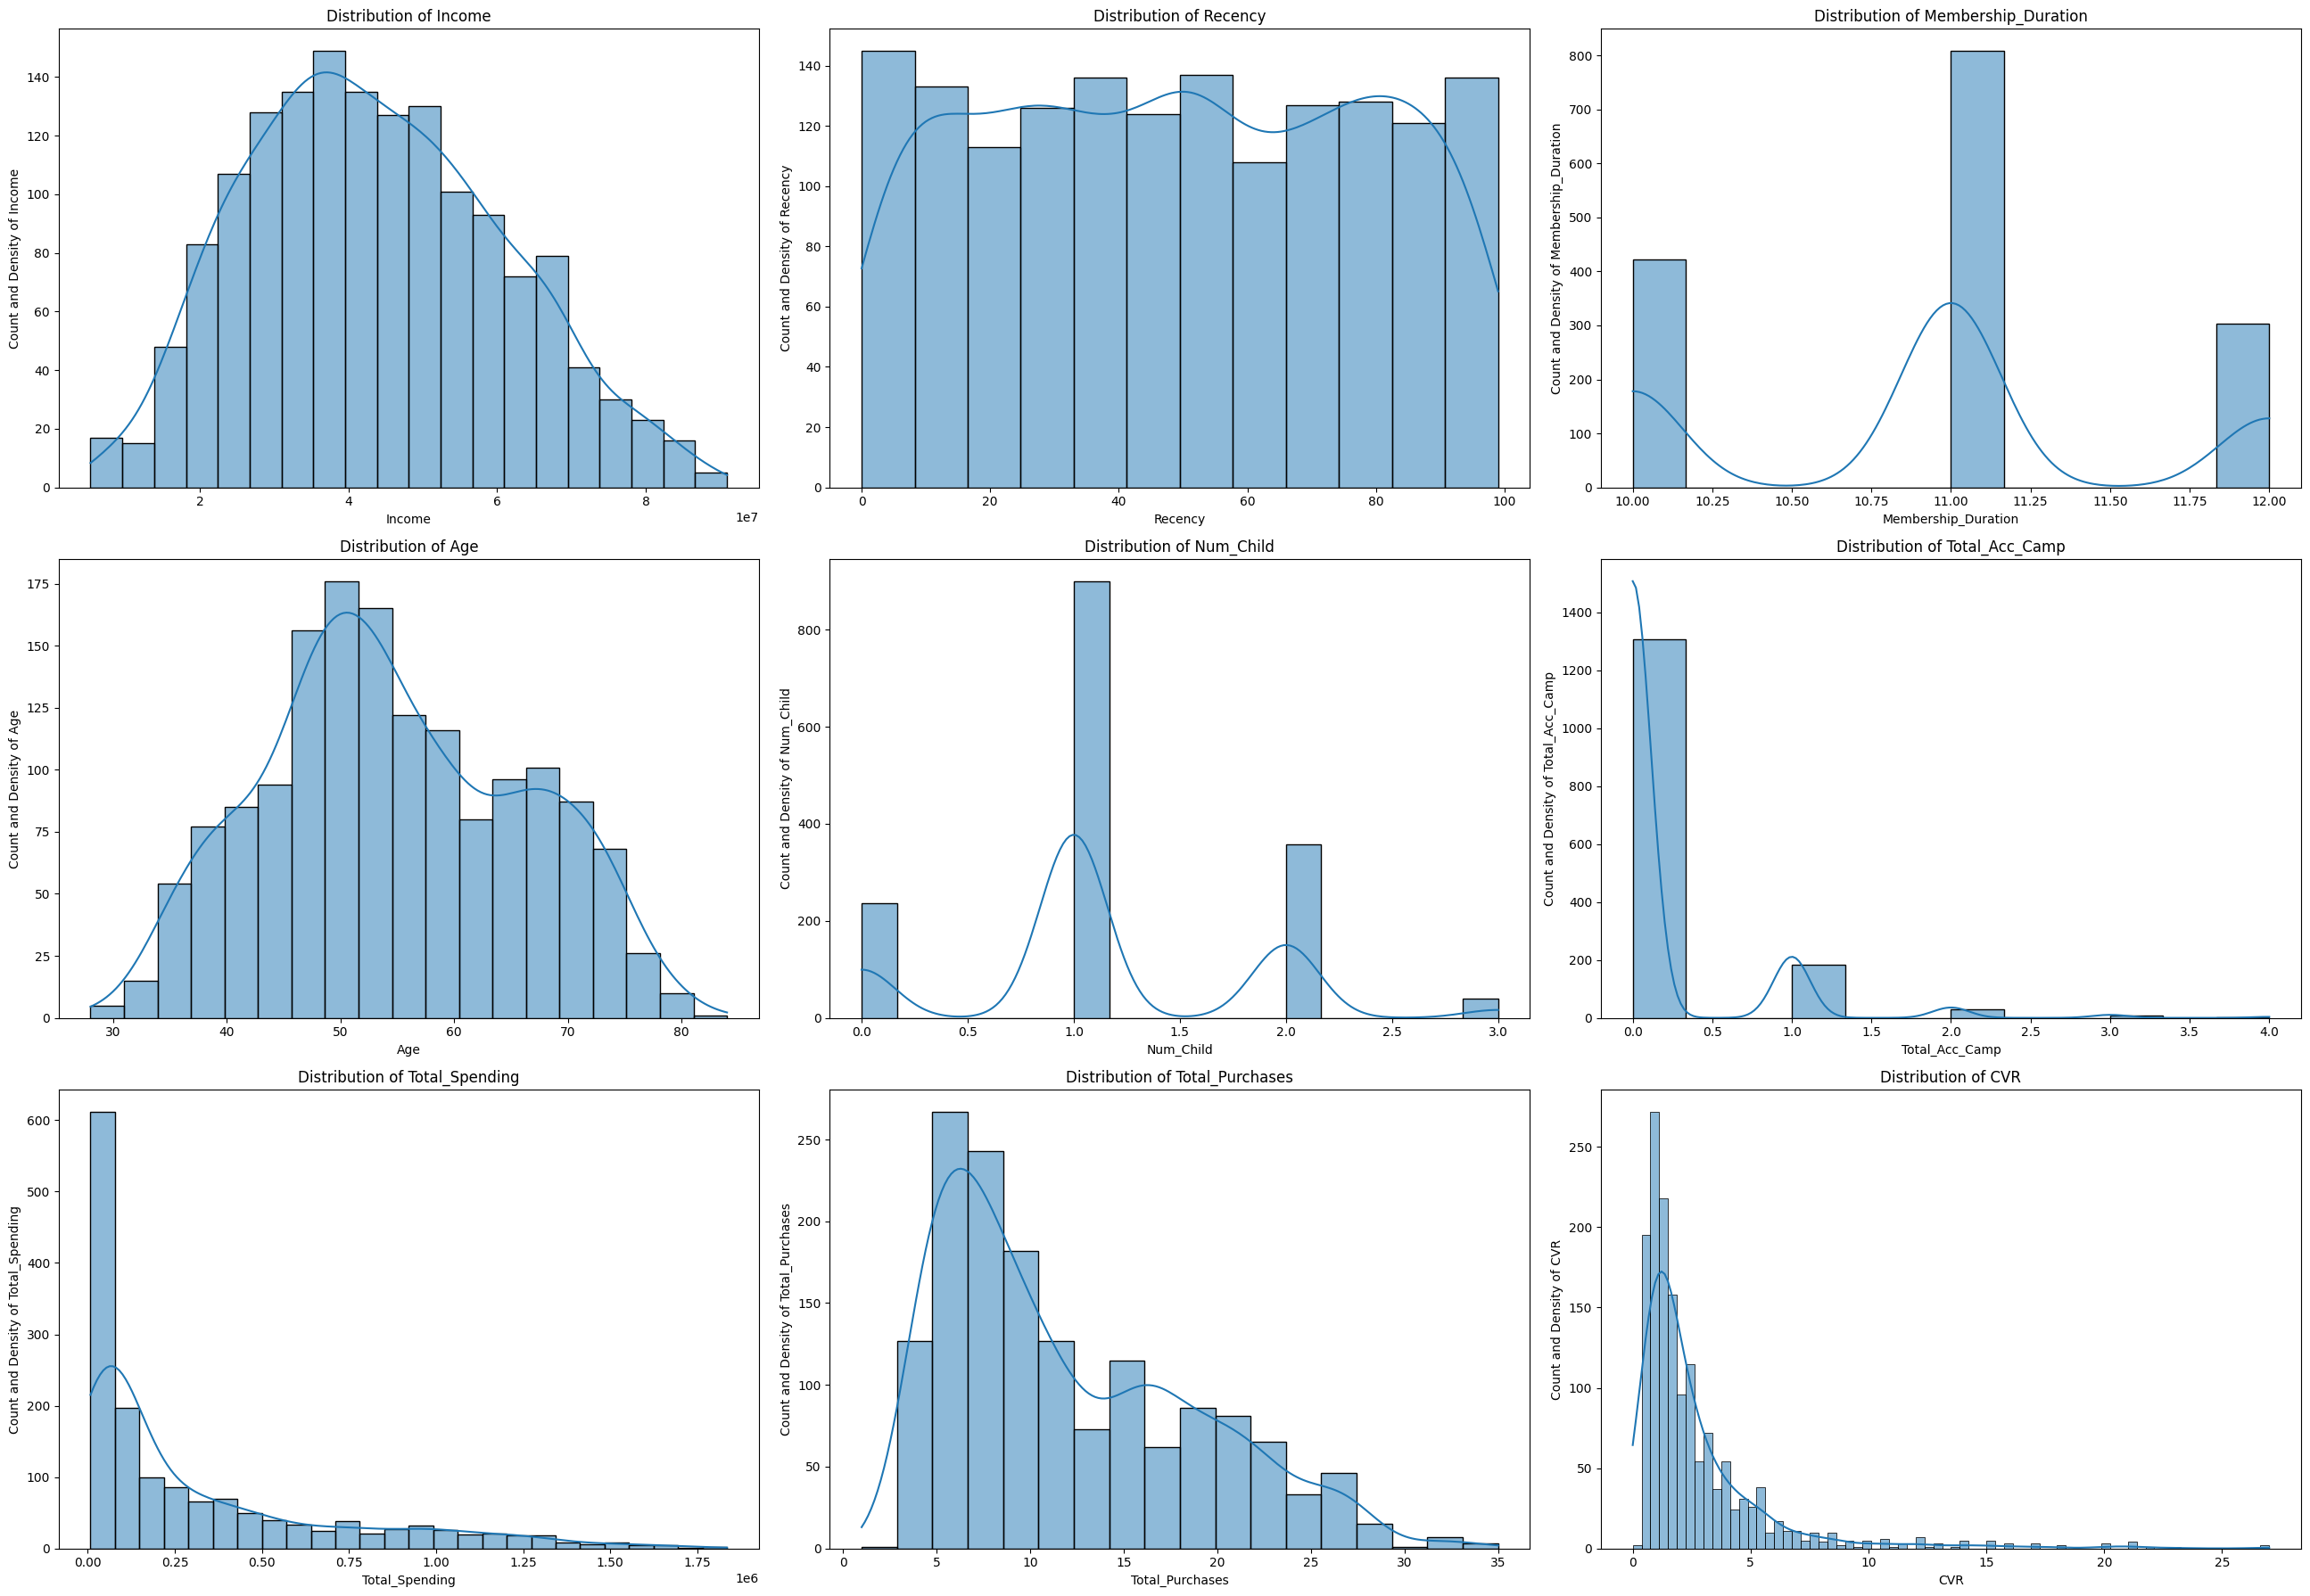

In [171]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
ax = ax.flatten()

for i in range(len(desc_cols)) :
  sns.histplot(data = df_filtered_outliers, ax=ax[i], x=desc_cols[i], kde=True)
  ax[i].set_title(f'Distribution of {desc_cols[i]}')
  ax[i].set_ylabel(f'Count and Density of {desc_cols[i]}')
  ax[i].set_xlabel(f'{desc_cols[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

In [179]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols + new_nums_cols:
    data = df_filtered_outliers[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols + new_nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Z_CostContact', 'Z_Revenue']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Kidhome', 'Teenhome']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Year_Birth,-0.152,-0.761,Normal Distribution (Symmetric)
1,Income,0.267,-0.516,Moderately Normal Distribution (Symmetric)
2,Kidhome,0.190,-1.035,Bimodal Distribution
3,Teenhome,0.228,-1.042,Bimodal Distribution
4,Recency,0.003,-1.210,Normal Distribution (Symmetric)
5,MntCoke,1.757,2.377,Highly Positively Skewed
6,MntFruits,2.362,5.657,Highly Positively Skewed
7,MntMeatProducts,2.422,6.031,Highly Positively Skewed
8,MntFishProducts,2.438,5.927,Highly Positively Skewed
9,MntSweetProducts,2.305,5.277,Highly Positively Skewed


### Categorical Columns

In [180]:
len(df_filtered_outliers[cats_cols].columns)

10

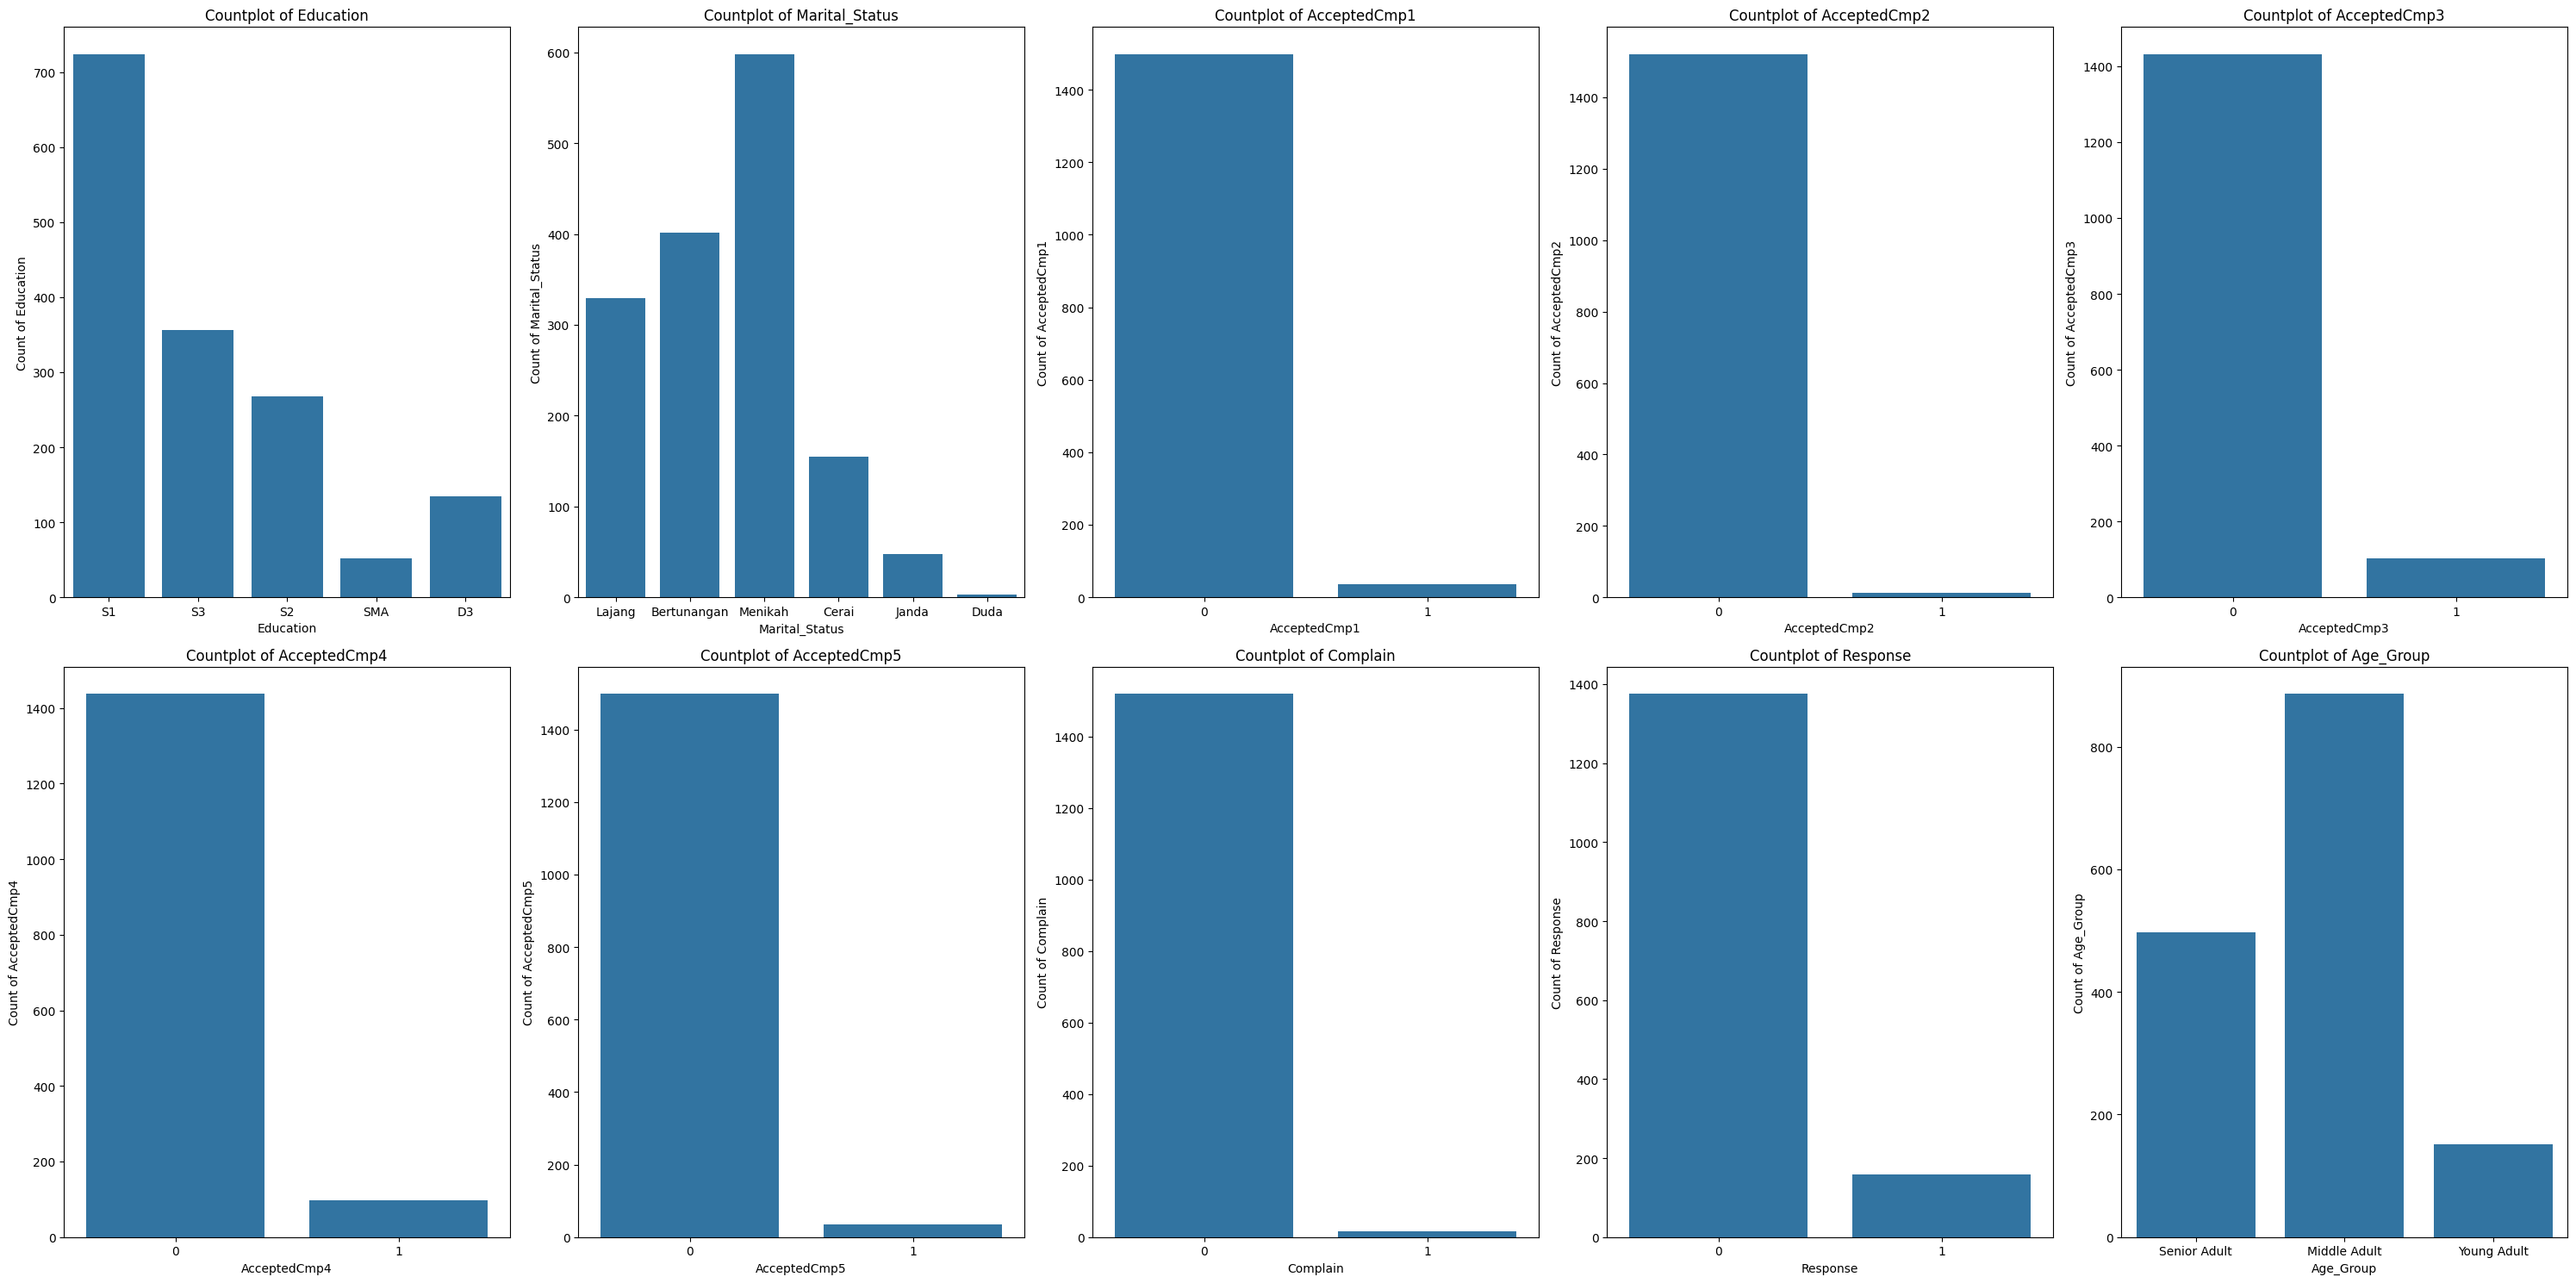

In [186]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
ax = ax.flatten()

cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

for i in range(len(cats_cols_excluding_id)) :
    sns.countplot(data=df_filtered_outliers, ax=ax[i], x=cats_cols_excluding_id[i])
    ax[i].set_title(f'Countplot of {cats_cols_excluding_id[i]}')
    ax[i].set_ylabel(f'Count of {cats_cols_excluding_id[i]}')
    ax[i].set_xlabel(f'{cats_cols_excluding_id[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

## Bivariate Analysis

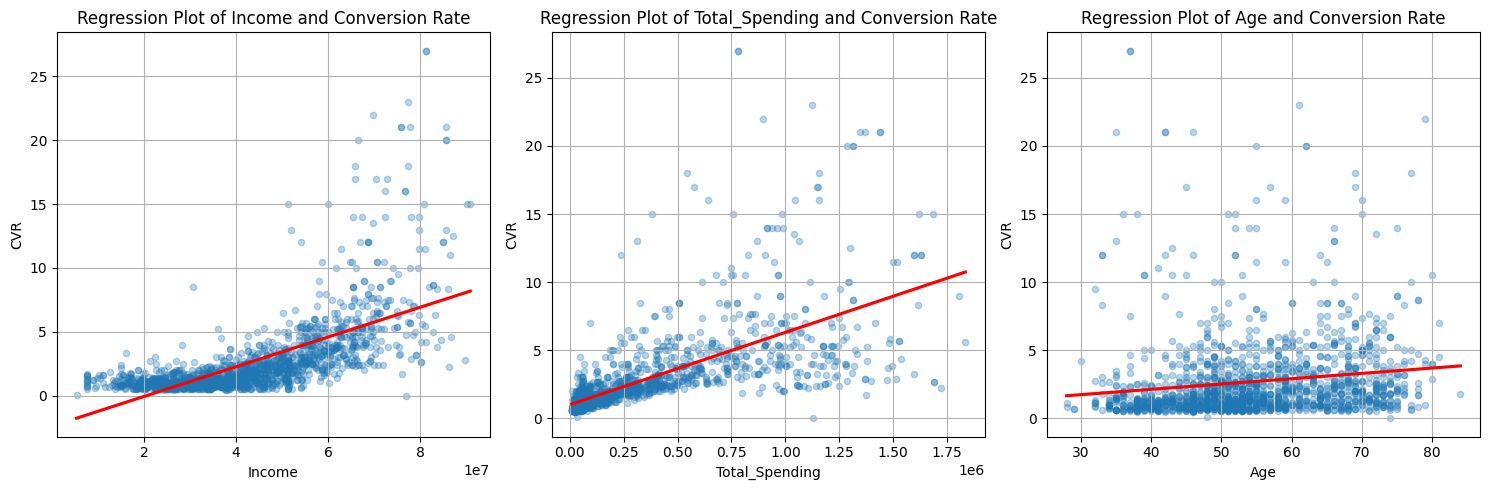

In [233]:
# Regplot of CVR vs Income, Total Spending, and Age

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='CVR', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

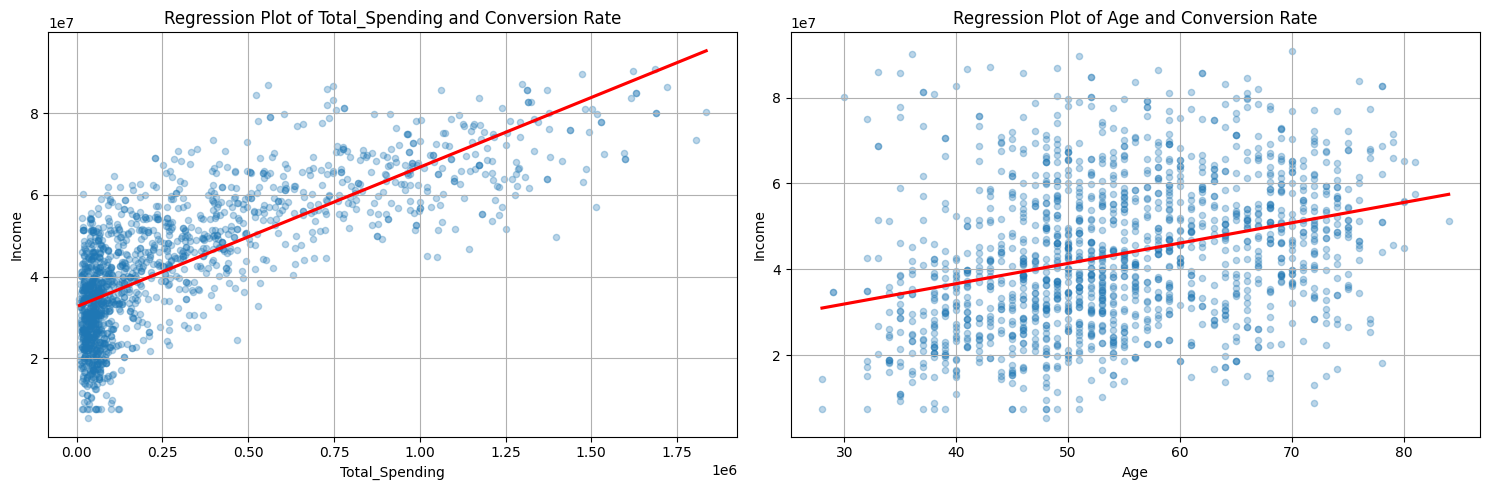

In [227]:
# Regplot of Income vs Total Spending and Age

included_col = ['Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='Income', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

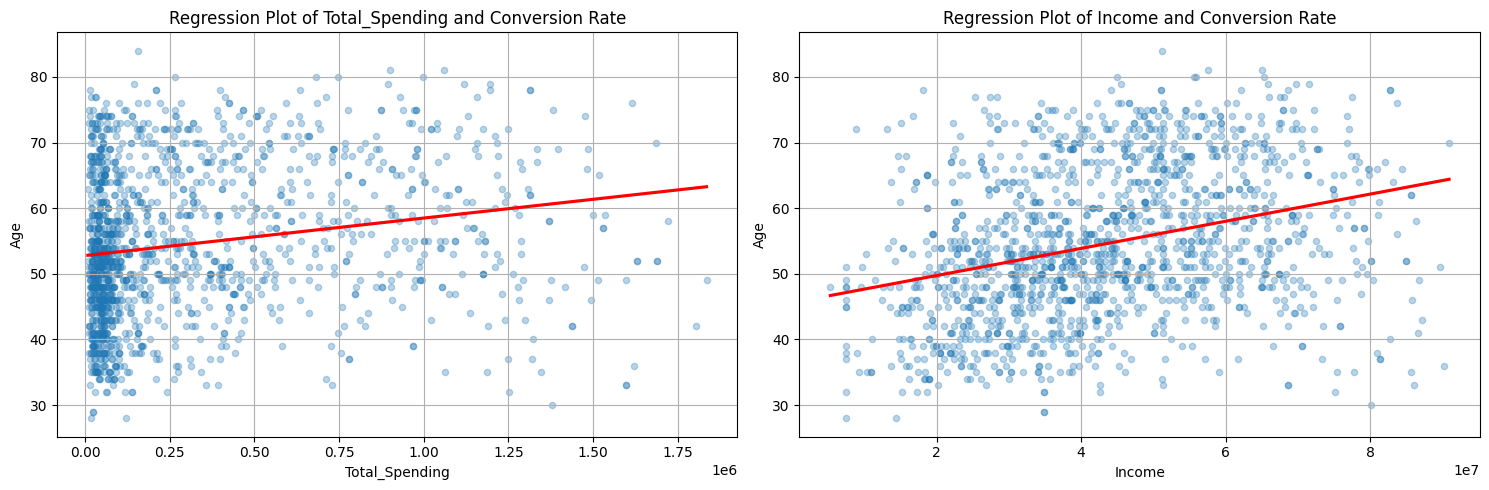

In [231]:
# Regplot of Income vs Total Spending and Age

included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='Age', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

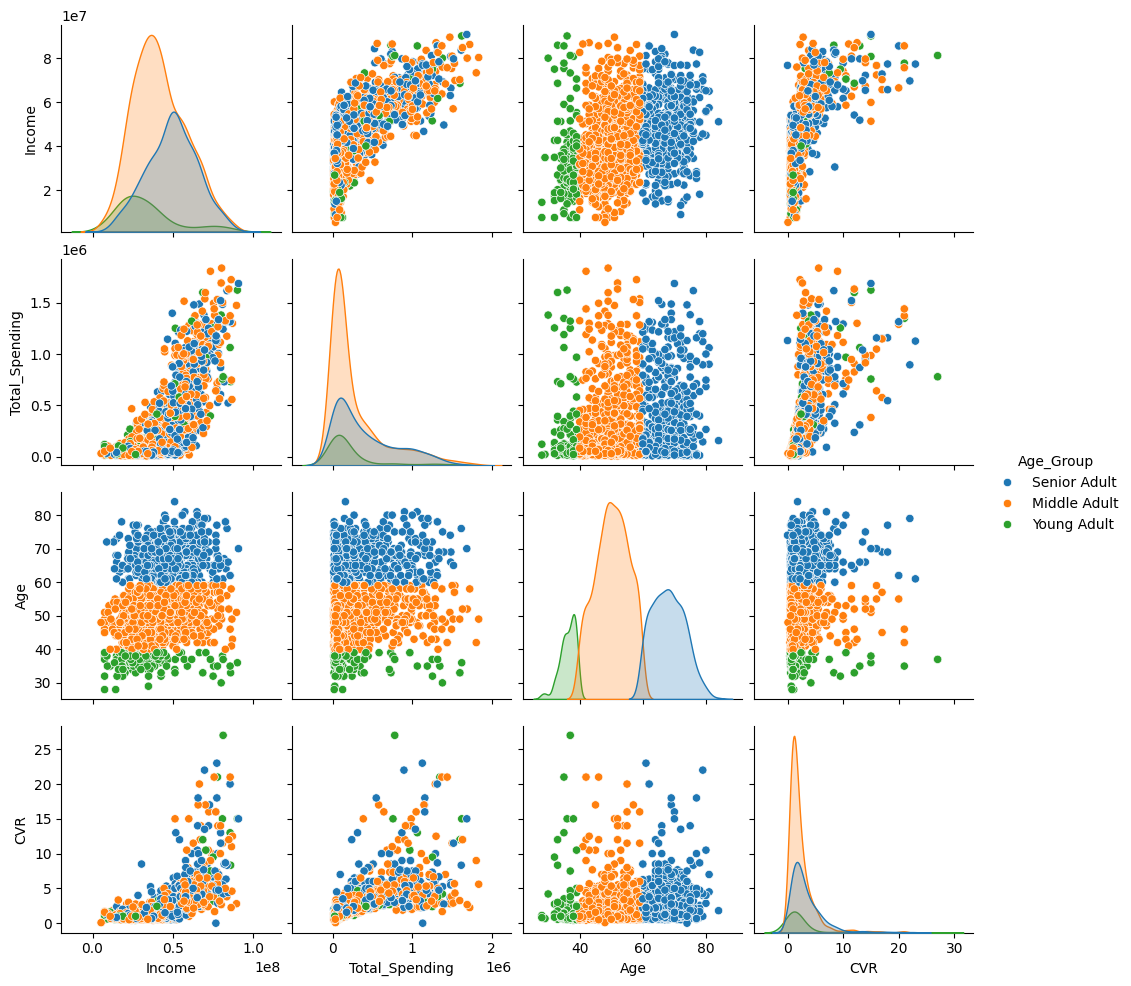

In [230]:
# Pairplot with hue Age Group
plt.figure(figsize=(15,15))

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']

sns.pairplot(data=df_filtered_outliers[included_col +['Age_Group']], hue='Age_Group', diag_kind='kde')
plt.show()

There aren't any interesting insights or significant patterns from the separation of Age Group between Income, Total Spending, and CVR

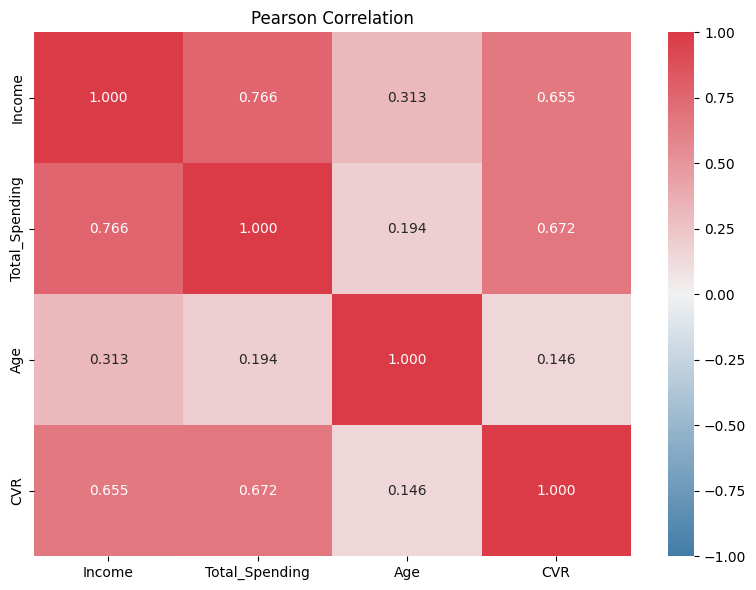

In [210]:
# Correlation heatmap of numerical features and target

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
plt.figure(figsize=(8,6))
sns.heatmap(data=df_filtered_outliers[included_col].corr(), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()